Team Member's Details :

PES1UG19CS025 - Adarsh Udameeshi 

PES1UG19CS208 - Karthik Nagabhushan

PES1UG19CS518 - Sumukh J Bharadwaj

PES1UG19CS545 - Tushar Y S

In [ ]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

In [ ]:
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Uploading the file**

In [ ]:
from google.colab import files
files.upload()

Saving swamifriends.txt to swamifriends (2).txt


{'swamifriends.txt': b'SWAMI AND FRIENDS \r\n\r\nA Novel of Malgudi \r\n\r\n\r\nf \r\n\r\n\r\nBy \r\n\r\nR. K. NARAYAN \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nINDIAN THOUGHT PUBLICATIONS \r\n\r\nMYSORE \r\n\r\n\r\n\r\nFirst Published \r\n\r\nHamish Hamilton, London: 1935 \r\nFirst Indian Edition; 1941 \r\nReprinted: 1946, 1954, 1956, 1965, \r\n1966, 1967, 1969, 1970, 1971, \r\n1972, 1977, 1982, 1983 \r\n\r\n\r\n\xc2\xa9 R. K. Narayan \r\n(all rights reserved) \r\n\r\n\r\n\r\n. PRINTED IN\' INDIA \r\nAT THE WESLEY PRESS, MYSORB CITY \r\n\r\n\r\nTO MY PARENTS \r\n\r\n\r\n\r\n\r\nLO \r\n\r\n\r\nALSO BY R. K. NARAYAN \r\n\r\n\r\nNOVELS OF MALGUDI \r\n\r\nWaiting for the Mahatma \r\nThe Financial Expert \r\nMr. Sam path \r\nThe English Teacher \r\nThe Dark Room \r\nThe Bachelor of Arts \r\nSivami and Friends \r\nThe Guide \r\n\r\nThe Man-Eater of Mdlgudi \r\nThe Vendor of Sweets \r\n\r\n\r\nGods, Demons, and Others \r\nThe Ramayana \r\n\r\n\r\nSTORIES \r\n\r\nA Horse and Two Goats \r\nAn Astrologer

In [ ]:
fp = open('swamifriends.txt')
tsof=fp.read()
print(tsof)


# ***SECTION A***

***Mentioning the characters in the graph***

In [ ]:
characters=['Swami','Rajam','Mani','Rajam_father','father','granny','mother','brother','Somu','Sankar','Head_Master','Ebenezar','coachman','Karuppan','Samuel','Kesavan']

**Tokenization**

In [ ]:
import nltk
nltk.download('punkt')
tsof = tsof.replace('Swaminathan', 'Swami')
tsof = tsof.replace('Rajam\'s father', 'Rajam_father')
tsof = tsof.replace('Swami\'s grandmother', 'granny')
tsof = tsof.replace('Swaminathan\'s grandmother', 'granny')
tsof = tsof.replace('grandmother', 'granny')
tsof = tsof.replace('Head Master', 'Head_Master')
tsof = tsof.replace('Coachman\'s son', 'Coachman_son')
tsof = tsof.replace('the Pea', 'Samuel')
sentences = sent_tokenize(tsof)
print(len(sentences))

In [ ]:
nltk.download('punkt')

In [ ]:
import nltk
nltk.download('punkt')

**Number of sentences in the dataset**

In [ ]:
sentences = sent_tokenize(tsof)
print(len(sentences))

In [ ]:
count = 0
chapters = []
for sent in sentences:
    if ("Chapter" in sent and sent[0] == 'C') or "Epilogue" in sent or "CHAPTER 42" in sent:
        sentences.remove(sent)
        count+=1
    elif 'Arthur Conan Doyle' in sent:
        sentences.remove(sent)

print(len(sentences))

In [ ]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

# ***SECTION B***

**Using Co-occurence Algorithm**

In [ ]:

for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

char_df


In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)
Gcpy = G

**Counting the number of nodes and edges**

In [ ]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

In [ ]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [ ]:
from operator import itemgetter

# ***SECTION C***

**Finding Degree Centrality**

In [ ]:
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

**Finding Betweeness Centrality**

In [ ]:
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

**Finding Closeness Centrality**

In [ ]:
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

In [ ]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print (sorted(pgr.items(), key=itemgetter(1), reverse=True))

**Calculating Local Clustering coefficient**

In [ ]:
print(nx.clustering(G))

**Calculating Global Clustering Coefficient**

In [ ]:
print(nx.average_clustering(G))

In [ ]:
nx.transitivity(G)

0.6119733924611973

# ***SECTION D***

In [ ]:
#Centrality scatter plot 
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)   
    

In [ ]:
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

In [ ]:
from scipy.stats.stats import pearsonr

r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print (s)

r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print (s)


r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print (s)

r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print (s)




 Pearson Correlation Coeff deg and betweenness: (0.7781487164943585, 0.00038543221750860597)

 Pearson Correlation Coeff deg and closeness: (0.982085949801329, 1.5142493711006253e-11)

 Pearson Correlation Coeff betweennness and closeness: (0.8761721954062653, 8.575783596737314e-06)

 Pearson Correlation Coeff betweennness and eigenvector : (0.6561784604781146, 0.005771072586455581)


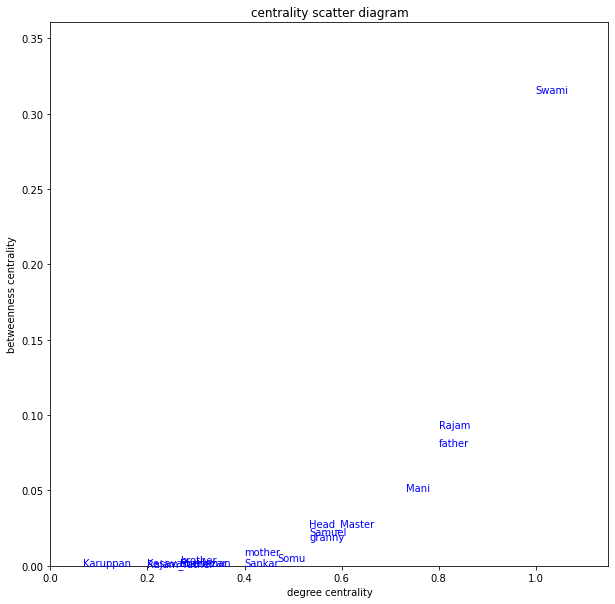

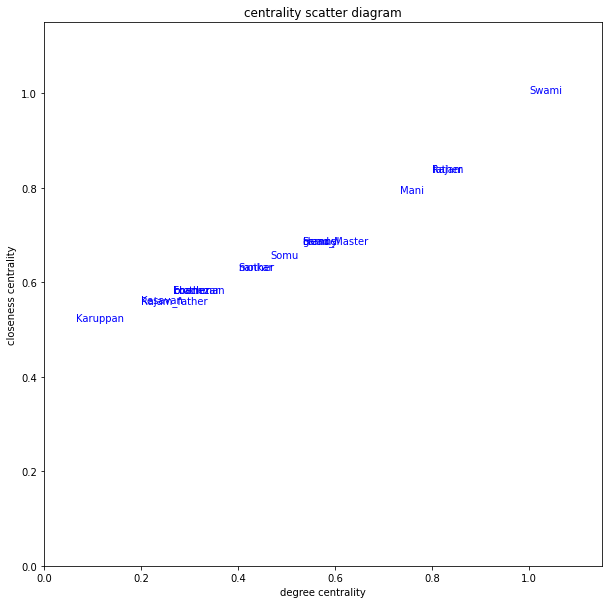

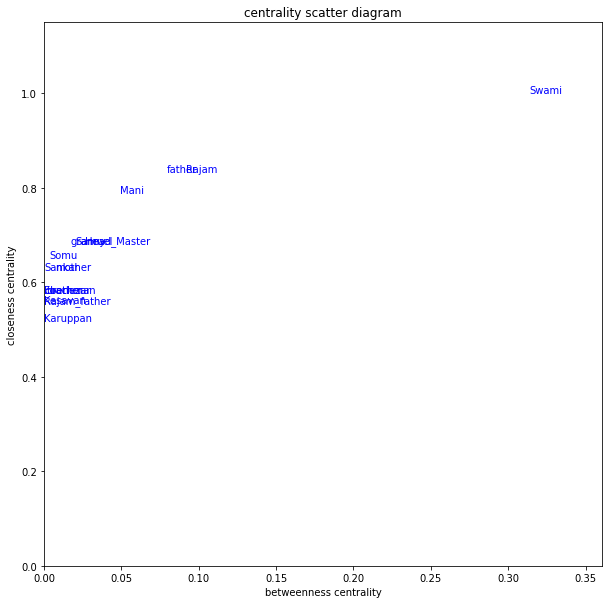

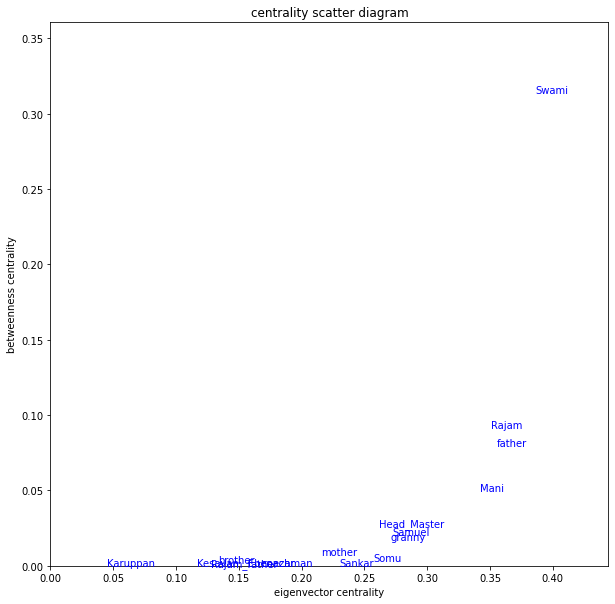

In [ ]:
##########################
# Draw centrality scatter 
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)
centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)

# ***SECTION E***

In [ ]:
import community

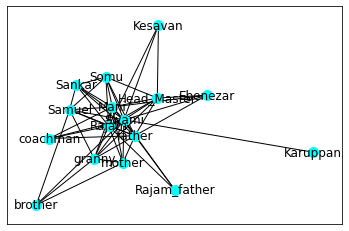

In [ ]:
nx.draw_networkx(G,with_labels=True, node_size=100,node_color='cyan')

In [ ]:
## Clique Percolation method : find community using 3 clique

In [ ]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 3))
print(c)

[frozenset({'Rajam_father', 'coachman', 'Kesavan', 'Ebenezar', 'Head_Master', 'Somu', 'Samuel', 'Rajam', 'Mani', 'granny', 'father', 'Swami', 'brother', 'mother', 'Sankar'})]


In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Ebenezar',
  'Head_Master',
  'Mani',
  'Rajam',
  'Rajam_father',
  'Samuel',
  'Sankar',
  'Somu',
  'Swami',
  'brother',
  'coachman',
  'father',
  'granny',
  'mother'],
 ['Karuppan'],
 ['Kesavan']]

In [ ]:
import community.community_louvain

In [ ]:
#first compute the best partition
part = community.community_louvain.best_partition(G)
print(part)

{'Swami': 1, 'Rajam': 1, 'Mani': 1, 'Rajam_father': 1, 'father': 1, 'granny': 2, 'mother': 2, 'brother': 2, 'Somu': 0, 'Sankar': 0, 'Head_Master': 1, 'Ebenezar': 1, 'coachman': 1, 'Karuppan': 1, 'Samuel': 0, 'Kesavan': 1}


In [ ]:
print(community.community_louvain.modularity(part, G))

0.06888260955780282


In [ ]:
induced = community.community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[1, 2, 0]
[(1, 1), (1, 2), (1, 0), (2, 2), (2, 0), (0, 0)]


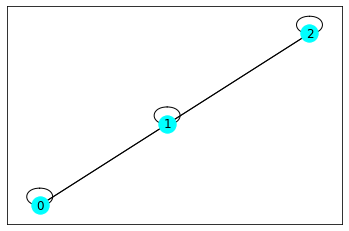

In [ ]:
nx.draw_networkx(induced,node_color='cyan')

In [ ]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  16
Edges:  56
Average degree:  3.5


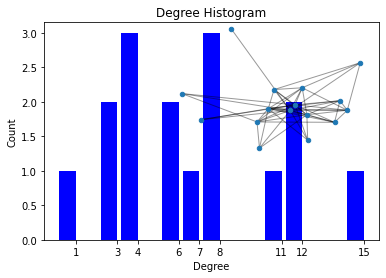

In [ ]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
# = list(A)[0]
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

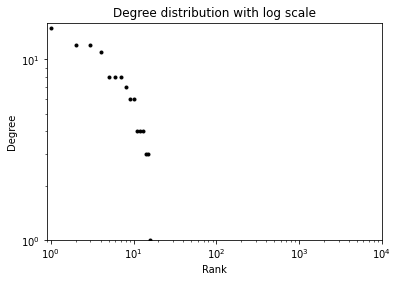

In [ ]:
########################################################################
# Degree distribution 
########################################################################

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

# loglog tells matplotlib to use log scales.
# The x values, range(1,10001), are the ranks, 
# and the degree_sequence are the y values.
# The String 'k.' means use black (k) dots (.)
'''
Now we need to do some plotting. Plotting using matplotlib is a lot like 
plotting using MATLAB. Because the degree distribution of a BA graph is a 
power-law, we'd like to use a plot with log scales. Here is how we'd do it.

'''
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
#list(nx.all_shortest_paths(G, source, target))
plt.savefig("degree_distribution.png")

In [ ]:

#Average Shortest Path 

nx.average_shortest_path_length(G)

1.5333333333333334

In [ ]:
#Giant Component 

#Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
#G0 = G.subgraph(Gcc[0])

a = nx.is_connected(G)
s='\n Is a connected graph: ' +repr(a)
print (s)

no=len(list(nx.connected_components(G)))
s='\n no of connected components: ' +repr(no)
print (s)

#Gecum13ate a sorted list of connected components, largest first 
CoC=sorted(nx.connected_components(G), key = len, reverse=True)
for item in CoC:
    cclen=len(item)
    s= "\n Connected component length:" +repr(cclen)
    print (s)
    print ("\n Connected component :")
    print (item)



 Is a connected graph: True

 no of connected components: 1

 Connected component length:16

 Connected component :
{'Rajam_father', 'coachman', 'Rajam', 'Kesavan', 'Mani', 'granny', 'father', 'brother', 'Ebenezar', 'Head_Master', 'Swami', 'Somu', 'Samuel', 'mother', 'Sankar', 'Karuppan'}


In [ ]:
nodes=G.number_of_nodes()
nodes

16

In [ ]:
#calculate average degree to use with random graph models 

degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  Swami  : Degree is  15
Node  Rajam  : Degree is  12
Node  Mani  : Degree is  11
Node  Rajam_father  : Degree is  3
Node  father  : Degree is  12


3.3125

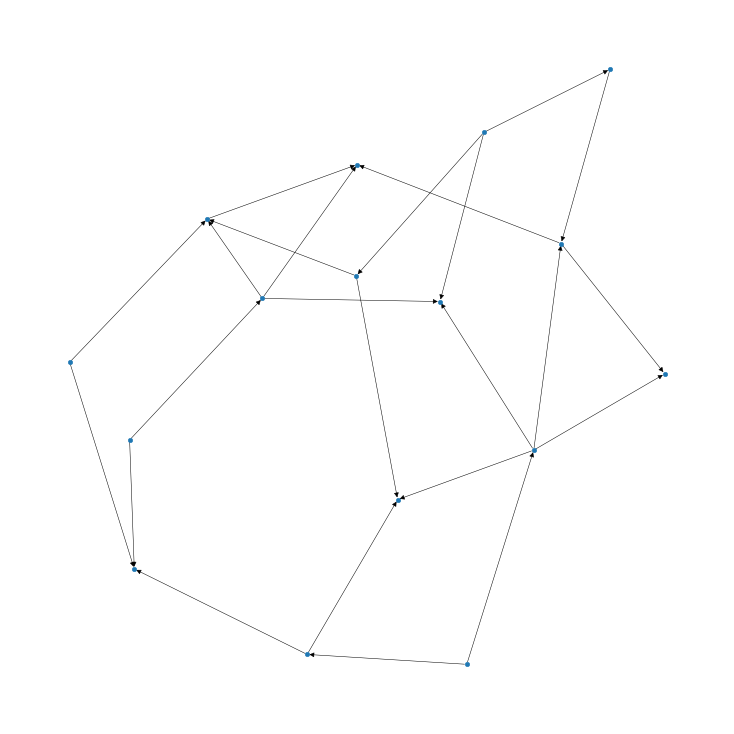

In [ ]:
p=avg_degree/(no_nodes-1)
#print(p)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()


In [ ]:
print(nx.average_clustering(G2))
print(nx.average_shortest_path_length(G2))

0.12083333333333333
2.325


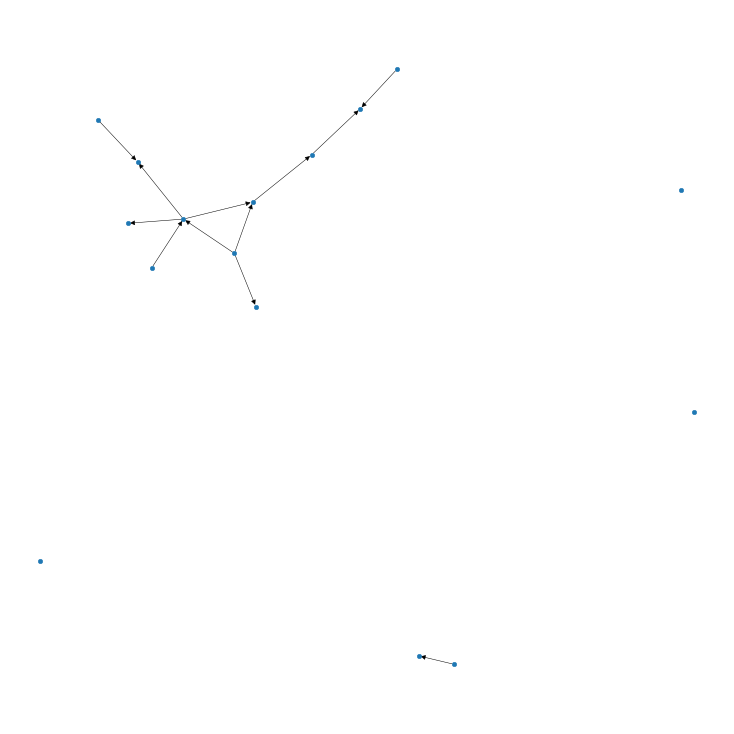

In [ ]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()


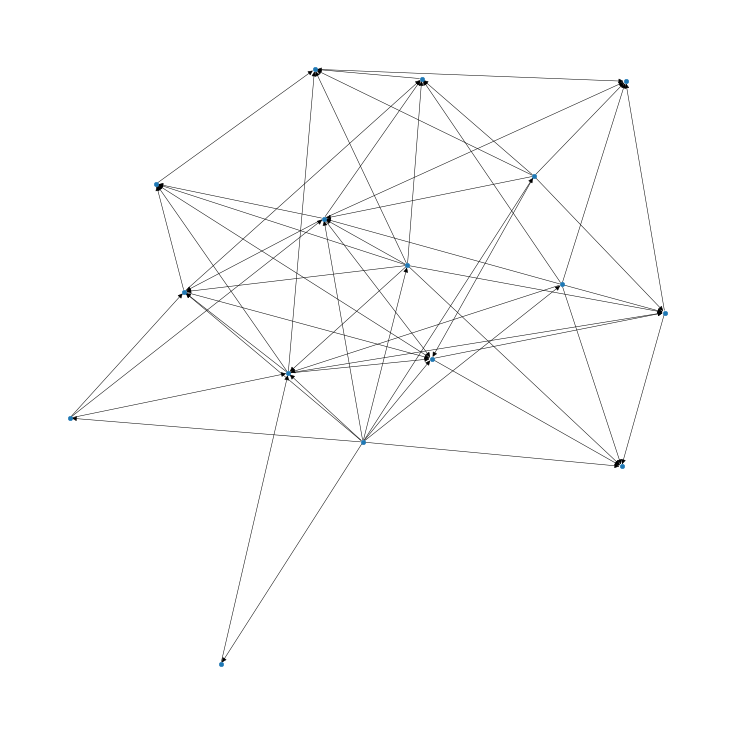

In [ ]:
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In [ ]:
print(nx.average_clustering(H))
print(nx.average_shortest_path_length(H))

0.5299107142857142
1.5583333333333333


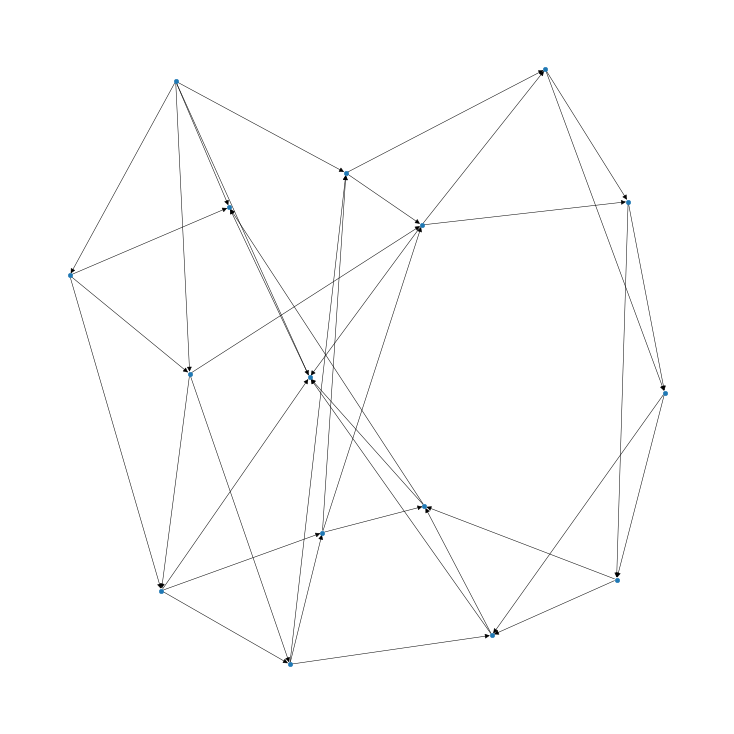

In [ ]:
H = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In [ ]:
print(nx.average_clustering(H))
print(nx.average_shortest_path_length(H))

0.3625
1.8833333333333333


Ego Network for protagonists

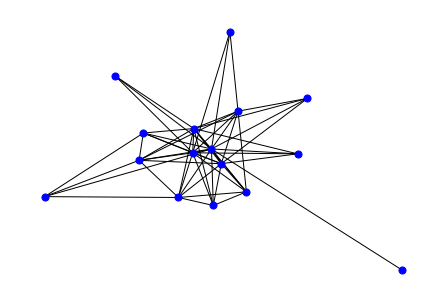

In [ ]:
#Ego network for Swami
s="Swami"
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(Gcpy,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('Swami.png')
plt.show()
nx.write_gml(hub_ego,"egonw_swami.gml")


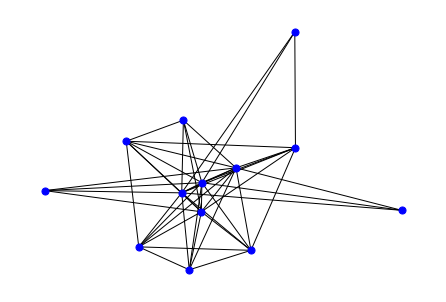

In [ ]:
#Ego network for Rajam
s="Rajam"
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(Gcpy,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('Rajam.png')
plt.show()
nx.write_gml(hub_ego,"egonw_rajam.gml")

### ***Analysis***

**Theme of the analysis: What you know of the story and is it matching with what you got from your network analysis ? Have you got any insight to offer ?**

The generated social network indicates that there is a total of 16 nodes representing the main characters and 56 edges representing speaking connections within the graph

Suggested guidelines:

**• Who are the protagonists as per your analysis? If the 4 centrality are not having high correlation, how do you interpret ?**

Swami and Rajam are the protagonists of the story. 
Swami has the highest node degree within the social network, where the degree represents the number of times Swami spoke to or was spoken to by other characters. This makes intuitive sense considering Swami is the main character. Further observations show that Rajam and Swami’s father have similar node degree centrality, second only to Swami. This seems to indicate that they are also characters of primary importance, just behind Swami. Those with very low node degrees more than likely had only one appearance within the entire play. 

Though Mani has less degree centrality, but high page rank centrality which indicates that though he has less number of connections, he has connections from influential nodes, which would mean that he also plays an important role in the story.

If the measures are not highly correlated, they indicate distinctive measures likely to be associated with different outcomes. But in our scenario the centralities have fairly high correlation

• **What do the clustering coefficients, discovered communities, extracted ego network of protagonists and average shortest path tell you about the dynamics in the story ?**

The protagonists have high Clustering coefficient which indicates that their neighborhood is well connected which means that density of ties is high. 

We have identified three communities - one huge community and two small communities. The big community has all the prominent characters which indicates that they interact throughout the story. The two smaller communities has minor characters included, which indicates that they occur only in specific chapters of the play. (For example Somu has appeared only in chapter 1)

The social graph has a very small average shortest path which proves that our network resembles real world models.

The denser the ties in an ego network, the stronger the ties, and the more insular the ego network and also the more homogeneous.

•**You have compared against a generative model (Random graph, Watts and Strogatz, Preferential Attachment etc.). The parameters from that model and those from your extracted graph, when compared , tell you what ?**

Our Social graph has high clustering coefficient and small average shortest path length which resembles the small world model.


Graph visualization using Gephi

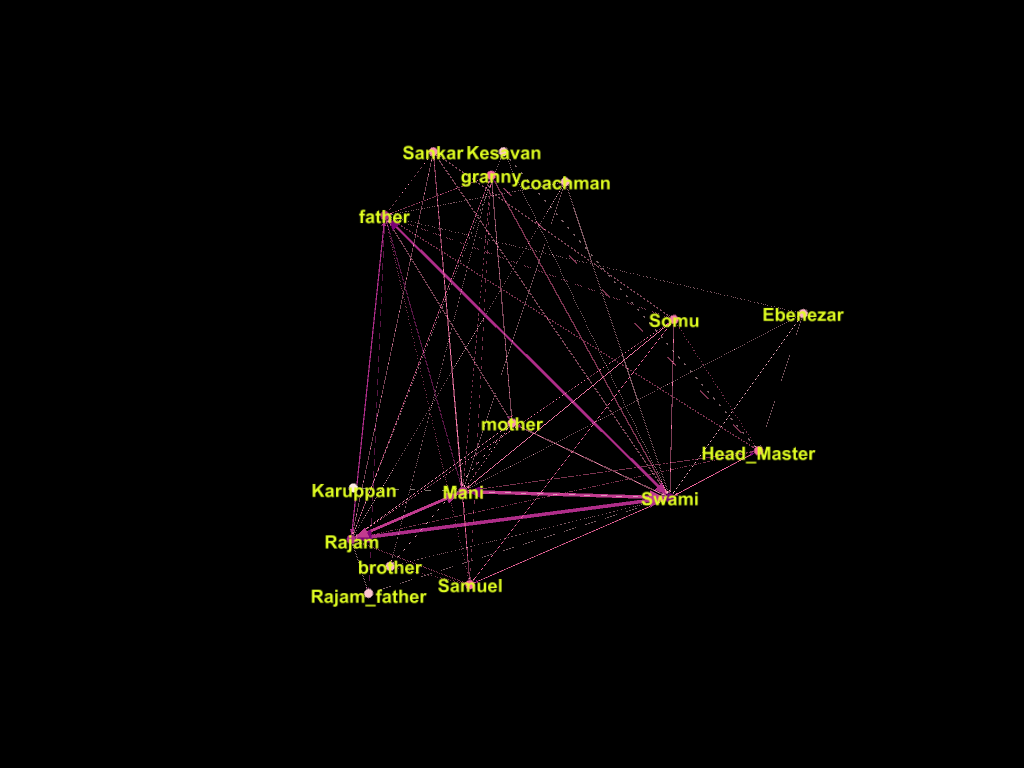